In [2]:
import time
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

In [2]:
dataset = pd.read_csv("Processed_Combined_IoT_dataset.csv")
dataset.head()

,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,current_temperature,door_state,fridge_temperature,humidity,latitude,light_status,longitude,motion_status,pressure,sphone_signal,temp_condition,temperature,thermostat_status,label
0,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.930769,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1,0
1,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.588462,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1,0
2,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.076923,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1,0
3,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.292308,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1,0
4,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.746154,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1,0


In [3]:
print(dataset.shape)
print(list(dataset.columns))

(401119, 18)
['FC1_Read_Input_Register', 'FC2_Read_Discrete_Value', 'FC3_Read_Holding_Register', 'FC4_Read_Coil', 'current_temperature', 'door_state', 'fridge_temperature', 'humidity', 'latitude', 'light_status', 'longitude', 'motion_status', 'pressure', 'sphone_signal', 'temp_condition', 'temperature', 'thermostat_status', 'label']


In [4]:
target_cols = list(dataset.columns[-1:])
target_cols

['label']

In [5]:
feature_cols = list(dataset.columns[:-1])
feature_cols

['FC1_Read_Input_Register',
 'FC2_Read_Discrete_Value',
 'FC3_Read_Holding_Register',
 'FC4_Read_Coil',
 'current_temperature',
 'door_state',
 'fridge_temperature',
 'humidity',
 'latitude',
 'light_status',
 'longitude',
 'motion_status',
 'pressure',
 'sphone_signal',
 'temp_condition',
 'temperature',
 'thermostat_status']

In [6]:
X = dataset.drop('label', axis=1)
y = dataset['label']

In [7]:
X.head()

,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,current_temperature,door_state,fridge_temperature,humidity,latitude,light_status,longitude,motion_status,pressure,sphone_signal,temp_condition,temperature,thermostat_status
0,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.930769,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1
1,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.588462,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1
2,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.076923,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1
3,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.292308,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1
4,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.746154,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1


In [8]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [9]:
kf = KFold(n_splits=5, shuffle=True, random_state=17)
evaluate = ['accuracy', 'precision', 'recall', 'roc_auc', 'f1']

In [10]:
clf = RandomForestClassifier(n_estimators=100, random_state=17)
scores = cross_validate(clf, X, y, scoring=evaluate ,cv=kf, n_jobs=-1)

In [11]:
def output():
    print("Accuracy: {:.5f}"        .format(scores['test_accuracy'].mean()))
    print("Precision: {:.5f}"       .format(scores['test_precision'].mean()))
    print("Recall: {:.5f}"          .format(scores['test_recall'].mean()))
    print("F1 Score: {:.5f}"        .format(scores['test_f1'].mean()))
    print("ROC AUC: {:.5f}"         .format(scores['test_roc_auc'].mean()))
    print("Train Time(s): {:.2f}"   .format(scores['fit_time'].mean()))
    print("Test Time(s): {:.2f}"   .format(scores['score_time'].mean()))

print("Random Forest classifier results are shown below.")
output()

Random Forest classifier results are shown below.
Accuracy: 0.87211
Precision: 0.90717
Recall: 0.74794
F1 Score: 0.81989
ROC AUC: 0.92770
Train Time(s): 274.88
Test Time(s): 19.70


In [12]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
scores = cross_validate(clf, X, y, scoring=evaluate ,cv=kf, n_jobs=-1)
print("Gaussian Naive Bayes classifier results are shown below.")
output()

Gaussian Naive Bayes classifier results are shown below.
Accuracy: 0.70079
Precision: 0.76845
Recall: 0.33097
F1 Score: 0.46267
ROC AUC: 0.64791
Train Time(s): 1.08
Test Time(s): 0.72


In [13]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='liblinear')
scores = cross_validate(clf, X, y, scoring=evaluate, cv=kf, n_jobs=-1)
print("Logistic Regression classifier results are shown below.")
output()

Logistic Regression classifier results are shown below.
Accuracy: 0.68841
Precision: 0.86143
Recall: 0.23766
F1 Score: 0.37254
ROC AUC: 0.69332
Train Time(s): 10.15
Test Time(s): 0.35


In [15]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(weights="distance")
scores = cross_validate(clf, X, y, scoring=evaluate, cv=kf, n_jobs=-1)
print("k-Nearest Neighbor classifier results are shown below.")
output()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis(solver='lsqr')
scores = cross_validate(clf, X, y, scoring=evaluate, cv=kf, n_jobs=-1)
print("Linear Discriminant Analysis classifier results are shown below.")
output()

Linear Discriminant Analysis classifier results are shown below.
Accuracy: 0.68364
Precision: 0.87668
Recall: 0.21780
F1 Score: 0.34891
ROC AUC: 0.67971
Train Time(s): 1.49
Test Time(s): 0.16


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=17)
scores = cross_validate(clf, X, y, scoring=evaluate, cv=kf, n_jobs=-1)
print("Decision Tree classifier results are shown below.")
output()

Decision Tree classifier results are shown below.
Accuracy: 0.86751
Precision: 0.89616
Recall: 0.74603
F1 Score: 0.81423
ROC AUC: 0.89085
Train Time(s): 3.18
Test Time(s): 0.23


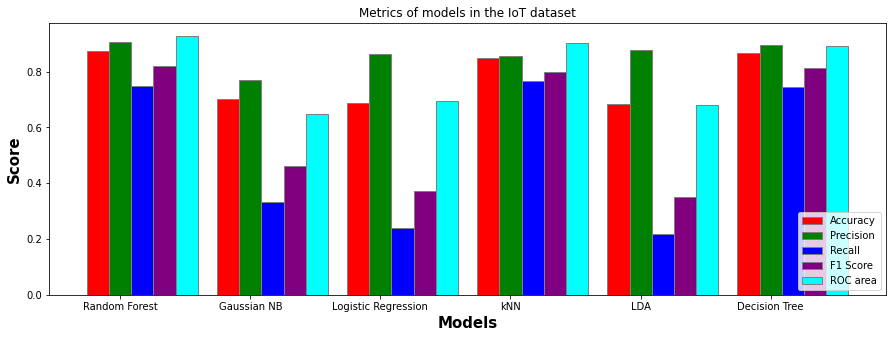

In [19]:
barWidth = 0.17
fig = plt.subplots(figsize=(15, 5))

Accuracy = [0.87211, 0.70079, 0.68841, 0.84716, 0.68364, 0.86751]
Precision = [0.90717, 0.76845, 0.86143, 0.85446, 0.87668, 0.89616]
Recall = [0.74794, 0.33097, 0.23766, 0.76716, 0.2178, 0.74603]
F_Score = [0.81989, 0.46267, 0.37254, 0.79938, 0.34891, 0.81423]
ROC_area = [0.9277, 0.64791, 0.69332, 0.90337, 0.67971, 0.89085]

br1 = numpy.arange(len(Accuracy))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]

plt.bar(br1, Accuracy, color='r', width=barWidth, edgecolor='grey', label='Accuracy')
plt.bar(br2, Precision, color='g', width=barWidth, edgecolor='grey', label='Precision')
plt.bar(br3, Recall, color='b', width=barWidth, edgecolor='grey', label='Recall')
plt.bar(br4, F_Score, color='purple', width=barWidth, edgecolor='grey', label='F1 Score')
plt.bar(br5, ROC_area, color='aqua', width=barWidth, edgecolor='grey', label='ROC area')

plt.xlabel('Models', fontweight='bold', fontsize=15)
plt.ylabel('Score', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth for r in range(len(Accuracy))], ['Random Forest', 'Gaussian NB', 'Logistic Regression', 'kNN', 'LDA', 'Decision Tree'])
plt.title("Metrics of models in the IoT dataset")
plt.legend(loc=4)
plt.show()


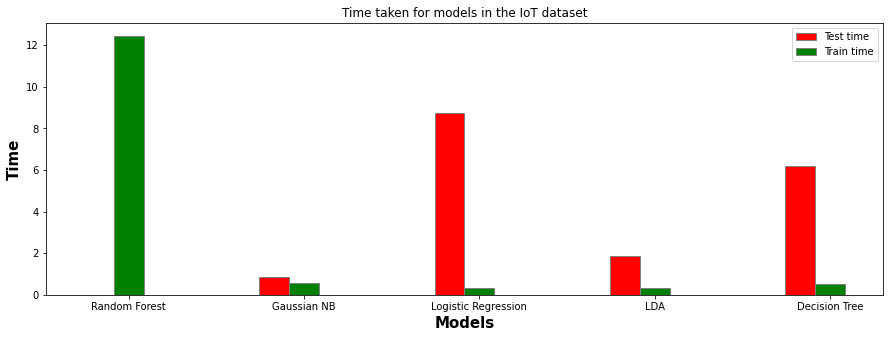

In [27]:
barWidth = 0.17
fig = plt.subplots(figsize=(15, 5))

train_time = [0, 0.88, 8.74, 1.89, 6.2]
test_time = [12.45, 0.58, 0.34, 0.31, 0.53]

br1 = numpy.arange(len(train_time))
br2 = [x + barWidth for x in br1]

plt.bar(br1, train_time, color='r', width=barWidth, edgecolor='grey', label='Test time')
plt.bar(br2, test_time, color='g', width=barWidth, edgecolor='grey', label='Train time')

plt.xlabel('Models', fontweight='bold', fontsize=15)
plt.ylabel('Time', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth for r in range(len(train_time))], ['Random Forest', 'Gaussian NB', 'Logistic Regression', 'LDA', 'Decision Tree'])
plt.title("Time taken for models in the IoT dataset")
plt.legend(loc=1)
plt.show()